## Introduction

In the realm of sports analytics, football stands out as an arena where data analysis can offer invaluable insights into player performance and team dynamics. Within this context, our analysis delves into the goal-scoring patterns of two football legends: Lionel Messi and Cristiano Ronaldo. 

The central question we seek to address is: What can the goal-scoring data of Messi and Ronaldo reveal about their playing styles, strengths, and contributions to their teams? 

By dissecting and interpreting their goal-scoring records, we aim to uncover underlying trends and patterns that can inform strategic decisions and enhance performance evaluation in football analytics.


### Importing important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/messi-ronaldo-goals.csv')
df.head()

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02-Mar,Liga Portugal,6,07/10/2002,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02-Mar,Liga Portugal,6,07/10/2002,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02-Mar,Liga Portugal,8,26/10/2002,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02-Mar,Taca de Portugal Placard,Fourth Round,24/11/2002,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02-Mar,Taca de Portugal Placard,Fifth Round,18/12/2002,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            1413 non-null   object
 1   Season            1413 non-null   object
 2   Competition       1413 non-null   object
 3   Matchday          1413 non-null   object
 4   Date              1413 non-null   object
 5   Venue             1413 non-null   object
 6   Club              1413 non-null   object
 7   Opponent          1413 non-null   object
 8   Result            1413 non-null   object
 9   Playing_Position  1355 non-null   object
 10  Minute            1413 non-null   object
 11  At_score          1413 non-null   object
 12  Type              1397 non-null   object
 13  Goal_assist       953 non-null    object
dtypes: object(14)
memory usage: 154.7+ KB


Text(0.5, 1.0, 'Percentage division of total goals combined: 1413')

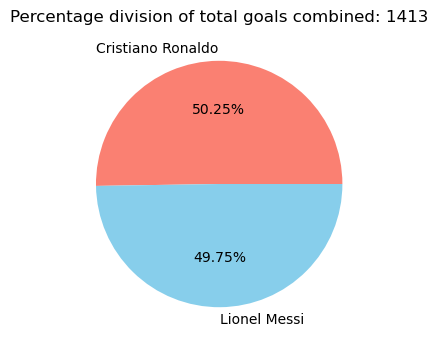

In [4]:
unique, count = np.unique(df['Player'], return_counts=True)
plt.figure(figsize=(4, 4))
plt.pie(count, labels=unique, autopct='%.2f%%', colors=['salmon', 'skyblue'])
plt.title(f'Percentage division of total goals combined: {df.shape[0]}')

##### In the available dataset, both Lionel Messi and Cristiano Ronaldo have scored a remarkable number of goals. Upon analysis, it is evident that Ronaldo has a slightly higher goal tally compared to Messi. Despite the slight difference, both players have showcased extraordinary goal-scoring prowess, leaving an indelible mark on the world of football.

### Data Cleaning

In [5]:
def convert_to_string(value):
    if '+' in value:
        parts = value.split('+')
        total_minutes = int(parts[0]) + int(parts[1])
        return total_minutes
    else:
        return int(value)

# Apply the function to the Minute column
df['Minute'] = df['Minute'].apply(convert_to_string)

In [6]:
df.Minute.unique()

array([ 34,  95,  88,  67,  13,  80,  74,  89,  60,   4,  44,  87,   9,
         8,  54,  58,  46,  21,  76,  91,  63,  90,  51,  12,  68,  50,
        82,  83,  75,  42,  14,  38,  45,  84,  59,  23,  19,  36,  73,
        10,  39,  85,  47,  77,  28,  11,  86,  49,  29,   5,  57,  43,
        62,  72,  79,  66,  41,  35,  81,  93,  22,  48,  70,  92,  69,
        18,  56,  16,  53,   3,  24,  32,  26,  25,  30,  61,  78,  65,
        31,  40,   6,  17,  55,  27,  15,   1,   2,  64, 110,   7,  71,
        37,  20,  33,  52, 103,  94,  96, 120, 104,  97, 105, 109],
      dtype=int64)

In [7]:
cr = df[df['Player'] == 'Cristiano Ronaldo']
lm = df[df['Player'] == 'Lionel Messi']
cr.shape, lm.shape

((710, 14), (703, 14))

In [8]:
cr.Playing_Position[cr.Playing_Position.isna()].count()
cr.Playing_Position.fillna(cr.Playing_Position.mode()[0], inplace=True)
cr.Playing_Position[cr.Playing_Position.isna()].count()

0

Filling null values with the most played position (mode)

In [9]:
lm.Playing_Position[lm.Playing_Position.isna()].count()

0

In [10]:
cr.Playing_Position = cr.Playing_Position.map({'CF ': 'CF', 'AM ': 'AM', 'SS ': 'SS', 'RW ': 'RW', 'LW ': 'LW'}).fillna(cr.Playing_Position)
lm.Playing_Position = lm.Playing_Position.map({'CF ': 'CF', 'AM ': 'AM', 'SS ': 'SS', 'RW ': 'RW', 'LW ': 'LW'}).fillna(lm.Playing_Position)
cr.Playing_Position.unique(), lm.Playing_Position.unique()

(array(['LW', 'RW', 'CF'], dtype=object),
 array(['CF', 'RW', 'LW', 'SS', 'AM'], dtype=object))

Filling anomalies with consistent values

### Visualization and Analyzing

Text(0.5, 1.0, 'Goal Type Distribution for Messi and Ronaldo')

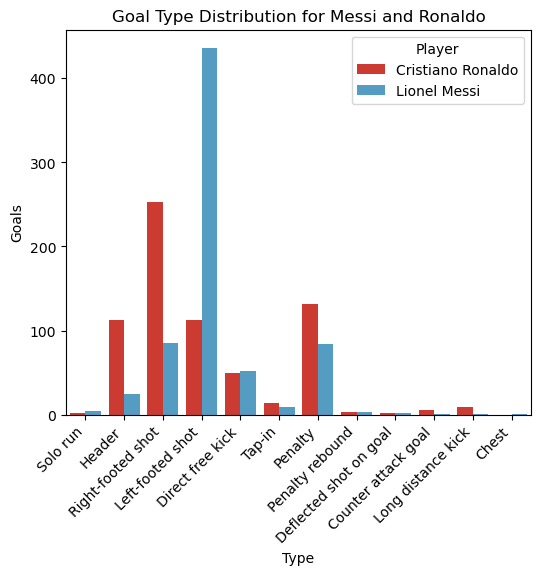

In [11]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Type', hue='Player', palette=['#E42518', '#43A1D5'])
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')
plt.title('Goal Type Distribution for Messi and Ronaldo')

### Goal Scoring Profile Comparison:

- **Messi:**
  - Predominantly unstoppable left-footed shots
  - Occasional right-footed goals
  - Goals from free kicks and penalties
  - Notable solo run goals, surpassing Ronaldo

- **Ronaldo:**
  - Versatile scoring with both feet
  - Balanced distribution of goals from right and left foot
  - Notable headers, surpassing Messi
  - Significant number of goals from penalties
  - Proficient in long-distance free kicks, a skill Messi has fewer instances of

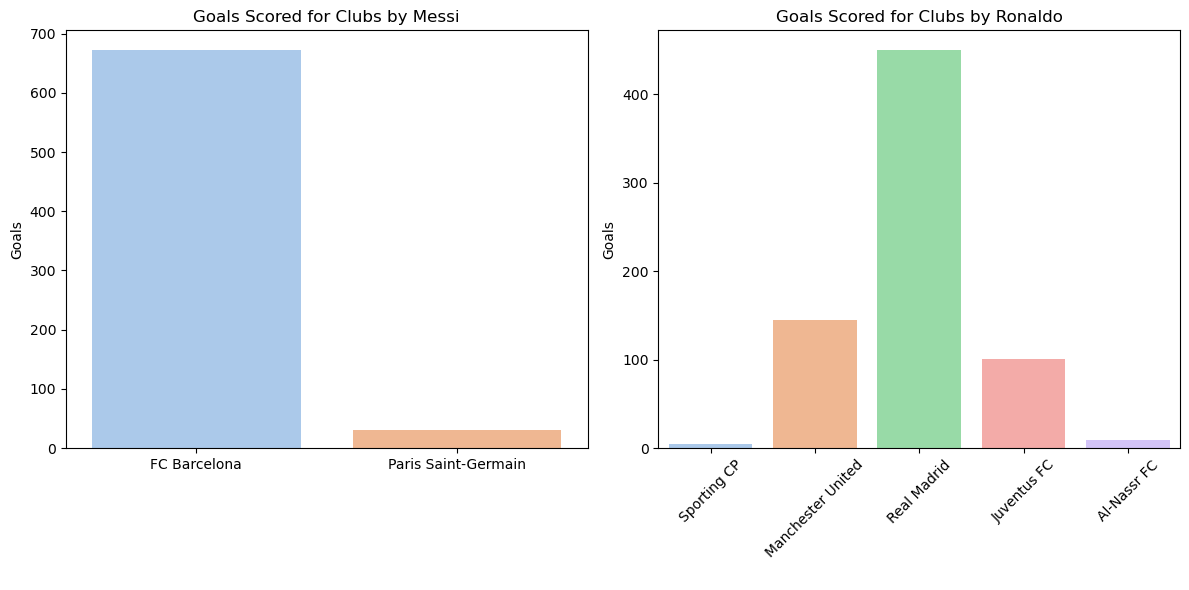

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=lm, x='Club', palette='pastel', ax=axs[0])
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Goals')
axs[0].set_title('Goals Scored for Clubs by Messi')

sns.countplot(data=cr, x='Club', palette='pastel', ax=axs[1])
axs[1].set_xlabel(' ')
axs[1].set_ylabel('Goals')
axs[1].set_title('Goals Scored for Clubs by Ronaldo')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

##### Messi most of his career for playing for a single team, FC Barcelona
##### Where as Ronaldo played for 5 different clubs, but his main clubs were Manchester United and Real Madrid

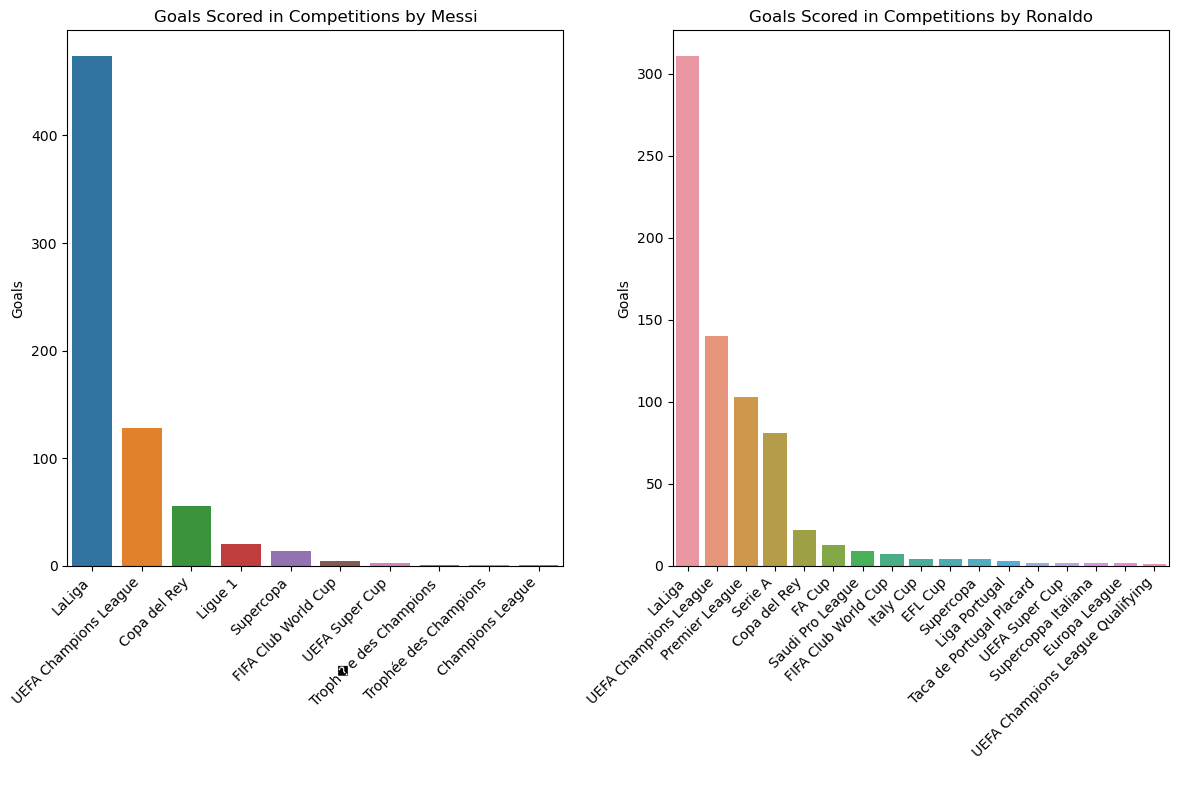

In [13]:
lm_sorted = lm['Competition'].value_counts().reset_index().sort_values(by='count', ascending=False)
cr_sorted = cr['Competition'].value_counts().reset_index().sort_values(by='count', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

sns.barplot(x='Competition', y='count', data=cr_sorted, ax=axs[1])
axs[1].set_xlabel(' ')
axs[1].set_ylabel('Goals')
axs[1].set_title('Goals Scored in Competitions by Ronaldo')
axs[1].set_xticklabels(cr_sorted['Competition'], rotation=45, ha='right')

sns.barplot(x='Competition', y='count', data=lm_sorted, ax=axs[0])
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Goals')
axs[0].set_title('Goals Scored in Competitions by Messi')
axs[0].set_xticklabels(lm_sorted['Competition'], rotation=45, ha='right')

plt.tight_layout()

#### Distribution of Goals in Different Competitions

Both Messi and Ronaldo have scored the most goals in La Liga, and the second most in UEFA Champions League (UCL).

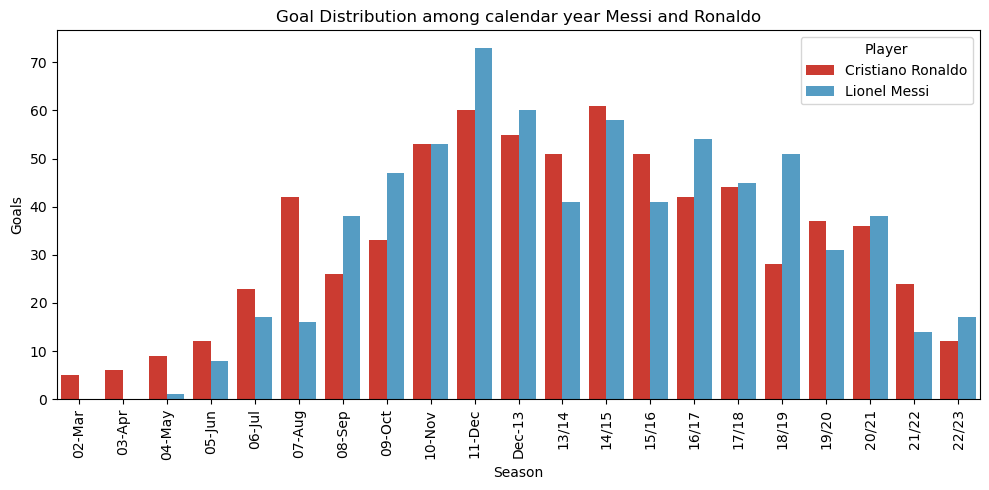

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Season', hue='Player', palette=['#E42518', '#43A1D5'])
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.title('Goal Distribution among calendar year Messi and Ronaldo')
plt.tight_layout()

Ronaldo's early start led to more goals initially, mainly because of his early start as a football professfional (as he is older), but as Messi hit his prime, they both traded the lead, showcasing a fierce and enduring competition between the two football legends

Additionally, Ronaldo achieved his highest goals in a calendar year in 2015, while Messi accomplished this feat in 2012

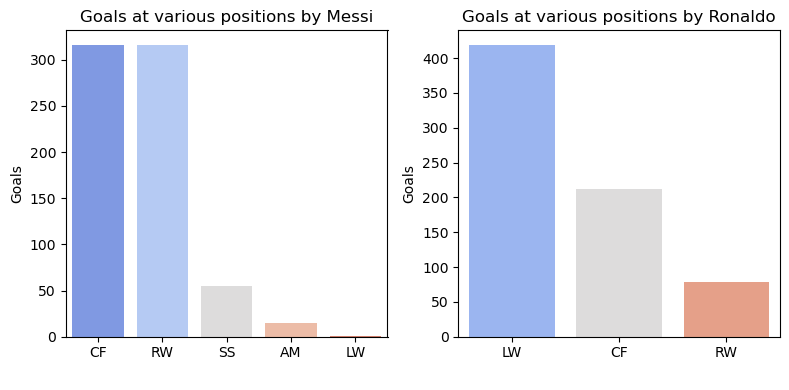

In [15]:
lm1 = lm['Playing_Position'].value_counts().reset_index().sort_values(by='count', ascending=False)
cr1 = cr['Playing_Position'].value_counts().reset_index().sort_values(by='count', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(x='Playing_Position', y='count', data=lm1, ax=axs[0], palette='coolwarm')
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Goals')
axs[0].set_title('Goals at various positions by Messi')
# axs[0].set_xticklabels(lm1['Playing_Position'], rotation=45, ha='right')

sns.barplot(x='Playing_Position', y='count', data=cr1, ax=axs[1], palette='coolwarm')
axs[1].set_xlabel(' ')
axs[1].set_ylabel('Goals')
axs[1].set_title('Goals at various positions by Ronaldo')
# axs[1].set_xticklabels(cr1['Playing_Position'], rotation=45, ha='right')

plt.tight_layout()

After analyzing the graph, we observe that Messi predominantly scored goals while playing as a center forward (CF) and Right Wing (RW), whereas Ronaldo's goals were primarily scored from the left wing (LW) position. This highlights their distinct playing styles and positions on the field.

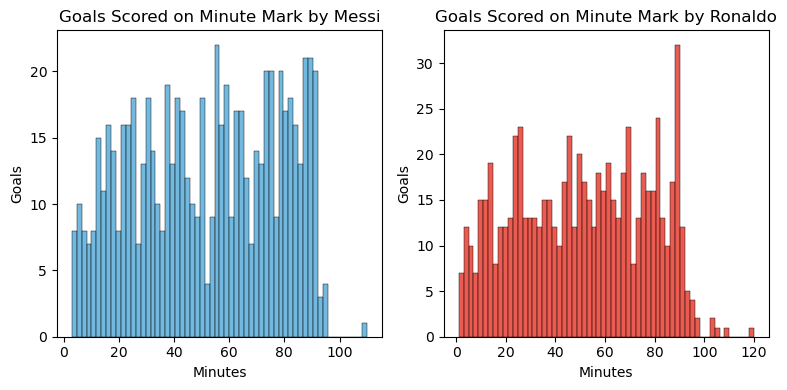

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(data=lm, x='Minute', bins=60, color='#43A1D5', ax=axs[0])
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Goals')
axs[0].set_title('Goals Scored on Minute Mark by Messi')

sns.histplot(data=cr, x='Minute', bins=60, color='#E42518', ax=axs[1])
axs[1].set_xlabel('Minutes')
axs[1].set_ylabel('Goals')
axs[1].set_title('Goals Scored on Minute Mark by Ronaldo')

plt.tight_layout()

Upon analyzing the goal distribution figures of Messi and Ronaldo, certain patterns emerge, shedding light on their goal-scoring tendencies in crucial moments:

### 1. Messi's Clutch Performance:
- Messi demonstrates a propensity for clutch performances, particularly evident when his team is granted additional minutes after the 90-minute mark.
- Furthermore, Messi's goal-scoring prowess is notable in situations of extra time, showcasing his ability to rise to the occasion during crucial periods.

### 2. Ronaldo's Comeback Ability:
- Ronaldo exhibits a knack for scoring a significant number of goals near the 90-minute mark.
- This tendency suggests Ronaldo's proficiency in making impactful comebacks, potentially influencing the outcome of matches during critical moments.

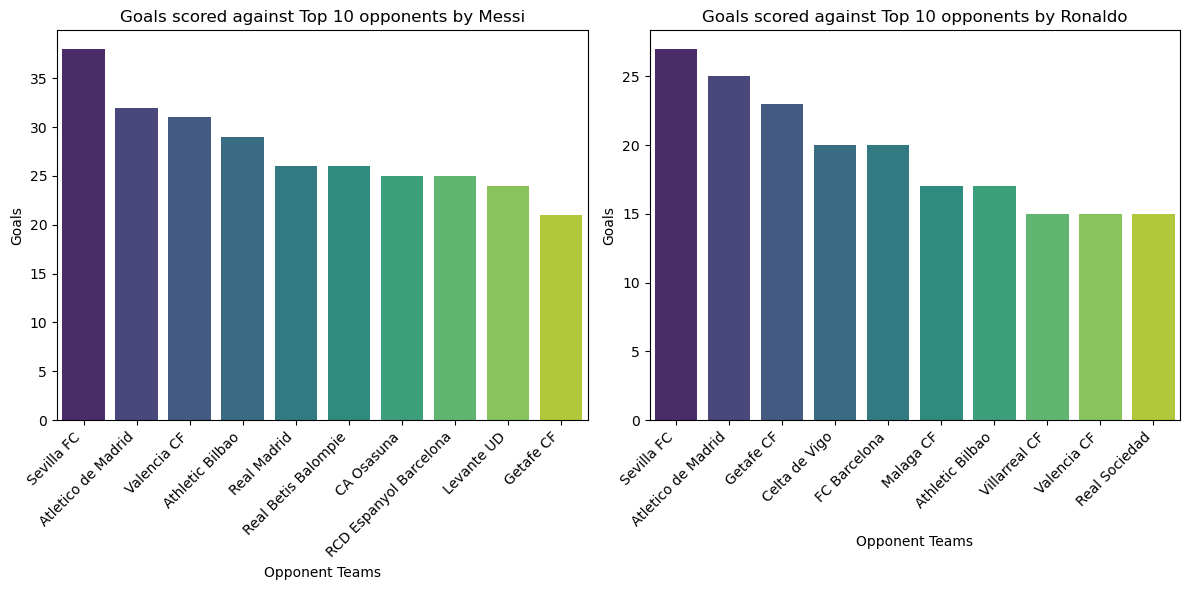

In [17]:
lm_top10_opponents = lm.sort_values(by='Opponent')['Opponent'].value_counts().reset_index()[:10]
cr_top10_opponents = cr.sort_values(by='Opponent')['Opponent'].value_counts().reset_index()[:10]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=lm_top10_opponents, x='Opponent', y='count', ax = axs[0], palette='viridis')
axs[0].set_xlabel('Opponent Teams')
axs[0].set_ylabel('Goals')
axs[0].set_title('Goals scored against Top 10 opponents by Messi')
axs[0].set_xticklabels(lm_top10_opponents['Opponent'], rotation=45, ha='right')

sns.barplot(data=cr_top10_opponents, x='Opponent', y='count', ax = axs[1], palette='viridis')
axs[1].set_xlabel('Opponent Teams')
axs[1].set_ylabel('Goals')
axs[1].set_title('Goals scored against Top 10 opponents by Ronaldo')
axs[1].set_xticklabels(cr_top10_opponents['Opponent'], rotation=45, ha='right')

plt.tight_layout()

From the above graph, we can make the following observations:

### Messi's Performance Against Real Madrid:
- Messi has scored a significant number of goals against Real Madrid, a team where Ronaldo spent most of his career.
- This indicates Messi's ability to perform exceptionally well against tough opponents, such as Real Madrid.
- He emerged as the greatest threat to Sevilla FC, for his incedible performance in every match against them.

### Ronaldo's Performance Against Barcelona:
- Ronaldo has also scored a notable number of goals against Barcelona, which was Messi's former team.
- This suggests Ronaldo's effectiveness in facing formidable opponents, including Barcelona.
- He emerged as the greatest threat to Athletico Madrid, for his incedible performance in every match against them

### Overall Performance:
- Both Messi and Ronaldo have scored a considerable number of goals against various teams, particularly in La Liga.
- The top 10 teams against whom they've scored the most goals predominantly consist of La Liga teams, highlighting their dominance in the Spanish league.

## Conclusion

In our exploration of the goal-scoring patterns of Lionel Messi and Cristiano Ronaldo, several key insights have emerged. We analyzed the goal count of both players, the distribution of goal types, and their performance for clubs and in various competitions. Additionally, we examined how goals are distributed across different calendar years and positions on the field. 

Furthermore, we delved into their scoring habits at various minute marks during matches and against top 10 opponents. What becomes evident is the remarkable consistency and versatility displayed by both Messi and Ronaldo throughout their careers. While fluctuations in performance may occur, the overall impact and contribution of these football legends remain unparalleled. 

In essence, our analysis underscores the enduring legacy of Messi and Ronaldo, highlighting their enduring influence and contributions to the beautiful game of football.
